In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [ ]:
# Función para obtener las noticias de una página



def get_news(url, mes):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f"❌ Error al acceder a {url}")
        return []
    
    soup = BeautifulSoup(response.text, "html5lib")
    
    news_data = []
    
    # Intentar buscar los artículos de manera más robusta
    articles = soup.find_all('a', class_='post-headline')
    
    if not articles:
        print(f"⚠ No se encontraron artículos en {mes.capitalize()}")
    
    # Inicializamos la variable para la fecha anterior
    previous_date = None
    
    for i, article in enumerate(articles, start=1):
        try:
            print(type(article), article.prettify())
            # Intentar obtener el título directamente desde el texto del enlace
            title = article.text.strip() if article else "Sin título"
            
            # Obtener el enlace (Url)
            link = article['href'] if article else "Enlace no encontrado"
            
            # Buscar la fecha en la etiqueta <p class="maya">
            date_tag = article.find_next('p', class_='maya', string=True)
            date = date_tag.text.strip() if date_tag else "Sin fecha"
            
            # Verificar los datos obtenidos
            if not title or not link or date == "Sin fecha":
                print(f"⚠ Información incompleta en el artículo {i}. Reintentando...\n")
                # Reintentar la extracción de datos en caso de que falten
                title = article.text.strip() if article else "Sin título"
                link = article['href'] if article else "Enlace no encontrado"
                date_tag = article.find_previous('p', class_='maya')
                date = date_tag.text.strip() if date_tag else "Sin fecha"
            
            # Asignar la fecha de la noticia
            if date != "Sin fecha":
                # Guardar la fecha actual para el siguiente artículo
                previous_date = date
            elif previous_date:
                # Si la fecha está vacía, usar la última fecha disponible
                date = previous_date
            
            # Mostrar datos extraídos para depuración
            print(f"📅 {mes.capitalize()} - Noticia {i}")
            print(f"   📰 Título: {title}")
            print(f"   🗓 Fecha: {date}")
            print(f"   📄 Enlace: {link}\n")
            
            # Añadir al listado de noticias
            news_data.append({'Fecha': date, 'Título': title, 'Url': link})
        except AttributeError:
            continue
    
    
    return news_data



In [ ]:


# Lista de meses de 2016
months_2016 = [
    "enero", "febrero", "marzo", "abril", "mayo", "junio",
    "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"
]

# URL base
base_url = "https://www.lajornadamaya.mx/k'iintsil/"

# DataFrame para almacenar todas las noticias
noticiasDataFrame = pd.DataFrame(columns=['Fecha', 'Título', 'Url'])

# Iterar sobre cada mes de 2016
for mes in months_2016:
    url = f"{base_url}{mes}-2016"
    print(f"🔎 Scrapeando {mes.capitalize()} 2016: {url}")
    news = get_news(url, mes)
    print(f"✅ Noticias extraídas en este mes: {len(news)}\n")
    
    if news:
        noticiasDataFrame = pd.concat([noticiasDataFrame, pd.DataFrame(news)], ignore_index=True)

    time.sleep(2)

# Guardar en CSV
noticiasDataFrame.to_csv("noticias_2016.csv", index=False, encoding='utf-8-sig')
print("🎉 Scrapeo completado y guardado en 'noticias_2016.csv'")


🔎 Scrapeando Enero 2016: https://www.lajornadamaya.mx/k'iintsil/enero-2016
<class 'bs4.element.Tag'> <a class="post-headline" href="https://www.lajornadamaya.mx/k'iintsil/82433/kaambalil-boon-uuch-kaajak-tu-lu-umil-maaya-ob" target="_blank">
 Kaambalil boon, úuch káajak tu lu’umil maaya’ob
</a>

📅 Enero - Noticia 1
   📰 Título: Kaambalil boon, úuch káajak tu lu’umil maaya’ob
   🗓 Fecha: 08 de enero, 2016
   📄 Enlace: https://www.lajornadamaya.mx/k'iintsil/82433/kaambalil-boon-uuch-kaajak-tu-lu-umil-maaya-ob

✅ Noticias extraídas en este mes: 1

🔎 Scrapeando Febrero 2016: https://www.lajornadamaya.mx/k'iintsil/febrero-2016
⚠ No se encontraron artículos en Febrero
✅ Noticias extraídas en este mes: 0

🔎 Scrapeando Marzo 2016: https://www.lajornadamaya.mx/k'iintsil/marzo-2016
<class 'bs4.element.Tag'> <a class="post-headline" href="https://www.lajornadamaya.mx/k'iintsil/80001/yaax-waal" target="_blank">
 Yáax wáal
</a>

📅 Marzo - Noticia 1
   📰 Título: Yáax wáal
   🗓 Fecha: 28 de marzo, 20

## Screapeando contenido

In [ ]:

noticiasDataFrame = pd.read_csv('noticias_2016.csv')
noticiasUrls = noticiasDataFrame["Url"].tolist()
noticiasDataFrame["Contenido"] = ""

# Función para obtener el contenido de una noticia
def get_content(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f"❌ Error al acceder a {url}")
        return "Contenido no disponible"
    
    soup = BeautifulSoup(response.text, "html5lib")
    
    # Buscar el contenido de la noticia
    content = soup.find('div', class_='post-meta').find_next_sibling('p')

    print(content.prettify())
    
    if not content:
        print(f"⚠ No se encontró contenido en {url}")
        return "Contenido no disponible"
    
    # Extraer el texto de la noticia
    text = content.text.strip().replace("\n", " ")
    
    return text


# Iterar sobre cada noticia para obtener su contenido
for i, url in enumerate(noticiasUrls, start=1):
    print(f"🔎 Obteniendo contenido de la noticia {i} de {len(noticiasUrls)}")
    content = get_content(url)
    print(f"✅ Contenido obtenido: {content[:50]}...\n")
    
    # Actualizar el DataFrame con el contenido de la noticia
    temp = noticiasDataFrame.loc[i-1, 'Contenido']
    noticiasDataFrame.loc[i-1, 'Contenido'] = content
    # if i == 2:
    #     break
    time.sleep(2)
noticiasDataFrame.to_csv("noticias_2016_2.csv", index=False, encoding='utf-8-sig')



🔎 Obteniendo contenido de la noticia 1 de 86
<p>
 Ap
 <br/>
 Oochel Sasil Sánchez
 <br/>
 K'iintsil
 <br/>
 <br/>
 8 ti' enero, 2016
 <br/>
 <br/>
 Ichil xaak’alilo’ob ma’ sen úuch beeta’ak ti’ u yúuchben kaajil Ek’ Báalam, yaan tu lak’inil u lu’umil Yucatán, j-ila’abe’ ma’ xan wa yanchaj jun jaats aj ts’íibil boono’ob tu péektsilto’ob boonil ti’ kaajo’ob je’el bix Chichén Itzá, ba’ale’ chéen jayp’éel ja’abo’ob mu’uk’anchaji.
 <br/>
 <br/>
 Instituto Nacional de Antropología e Historia (INAH) tu ts’áaj k’ajóoltbil ti’ jump’éel ts’íibe’, ichil u ja’abilo’ob 770 yéetel 801 ts’o’okili’ u síijil ki’ichkelem yuum, k’uch ti’ Ek’ Báalam aj ts’íibo’ob tu xa’ak’beso’ob bix u yúuchul ts’íib ka’ach yéetel boonil; beey uchik u síijil chíikulalo’ob béeychaj u yila’al ti’ jejeláas kúuchilo’ob ti’ le baantao’.
 <br/>
 <br/>
 Beyxan tu kanajo’ob boon ti’ nu’ukulo’ob wóolistako’ob je’el bix le beeta’abo’ob yéetel k’at, beyxan tu táaxil tuunicho’ob je’el bix u maako’ob yéetel pak’o’ob, tumen béeychaj ta

In [ ]:
import locale

# Establecer el idioma local en español para reconocer los nombres de los meses
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')  # Para sistemas basados en Unix (Linux, Mac)
# locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')  # Para Windows


noticiasDataFrame = pd.read_csv('noticias_2016_2.csv')

# Crear el DataFrame (suponiendo que ya lo tienes cargado)
noticiasDataFrame['Fecha'] = pd.to_datetime(noticiasDataFrame['Fecha'], format='%d de %B, %Y', errors='coerce')
print(noticiasDataFrame)

# Agrupar por mes y contar registros
registros_por_mes = noticiasDataFrame.groupby(noticiasDataFrame['Fecha'].dt.to_period('M')).size()

# Calcular el promedio de registros por mes
promedio_por_mes = registros_por_mes.mean()

print("Promedio de registros por mes:", promedio_por_mes)



        Fecha                                           Título  \
0  2016-01-08  Kaambalil boon, úuch káajak tu lu’umil maaya’ob   
1  2016-03-28                                        Yáax wáal   
2  2016-03-20                                         KIINTSIL   
3  2016-03-19                                         Kiintsil   
4  2016-03-04                               U paax Iron maiden   
..        ...                                              ...   
81 2016-12-09    J-A’alab ti’ ba’alche’ ka u paklan jantuba’ob   
82 2016-12-06       U yóoxtéenil meyajil Simposio Ichkaantijoo   
83 2016-12-06               Tu taamil u ja’ilo’ob Quintana Roo   
84 2016-12-04                                        PLIA 2016   
85 2016-12-04            K’ame’ex u níib óolal in puk’si’ik’al   

                                                  Url  \
0   https://www.lajornadamaya.mx/k'iintsil/82433/k...   
1   https://www.lajornadamaya.mx/k'iintsil/80001/y...   
2   https://www.lajornadamaya.mx/k'i

In [26]:
import matplotlib.pyplot as plt

# Asegúrate de que la columna 'Fecha' esté en formato datetime
noticiasDataFrame['Fecha'] = pd.to_datetime(noticiasDataFrame['Fecha'], format='%d de %B, %Y', errors='coerce')

# Agrupar por mes y contar el número de noticias
noticiasDataFrame['Mes'] = noticiasDataFrame['Fecha'].dt.to_period('M')  # Extraer año y mes
conteo_mensual = noticiasDataFrame.groupby('Mes').size()  # Contar noticias por mes

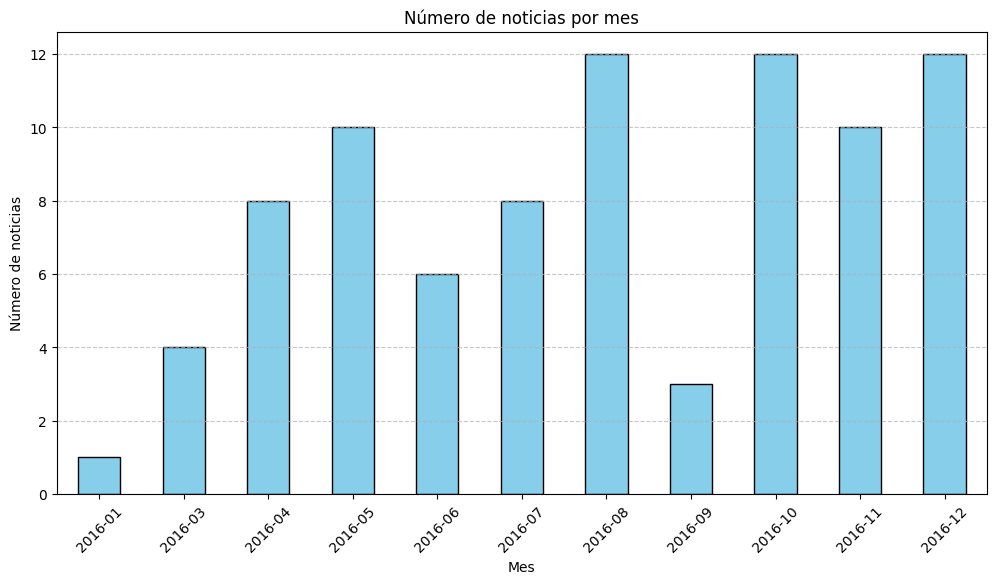

In [27]:
# Crear la gráfica
plt.figure(figsize=(12, 6))  # Ajustar tamaño
conteo_mensual.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizar la gráfica
plt.xlabel('Mes')
plt.ylabel('Número de noticias')
plt.title('Número de noticias por mes')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de rejilla

# Mostrar la gráfica
plt.show()


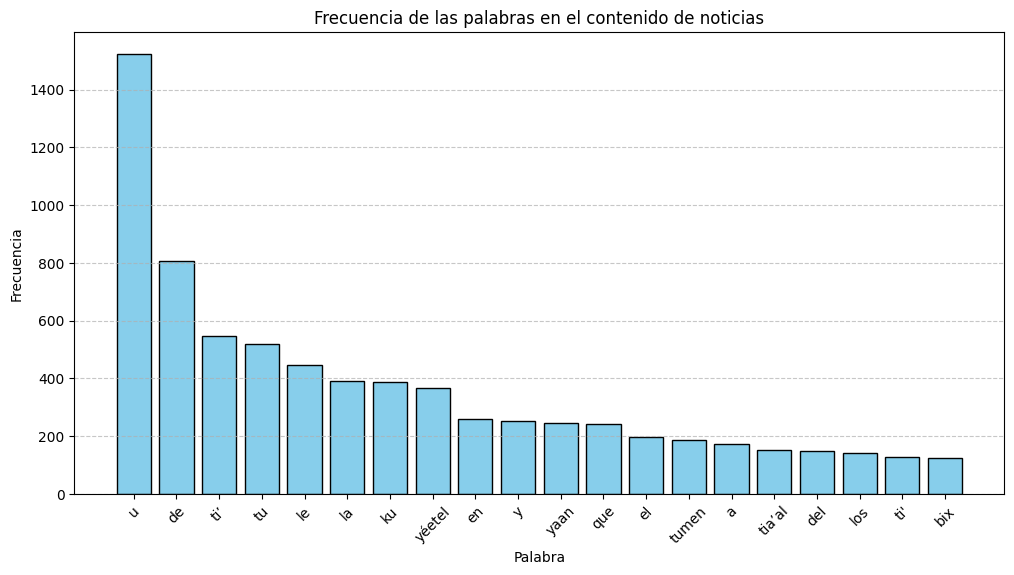

In [ ]:
from collections import Counter
import pandas as pd

import matplotlib.pyplot as plt

# Leer el archivo CSV
noticias = pd.read_csv('noticias_2016_2.csv')

# Concatenar todo el contenido en una sola cadena de texto
all_content = ' '.join(noticias['Contenido'].dropna().tolist())

# Dividir el contenido en palabras
words = all_content.split()

# Contar la frecuencia de cada palabra
word_freq = Counter(words)

# Convertir el contador a un DataFrame para facilitar la visualización
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia en orden descendente
word_freq_df = word_freq_df.sort_values(by='Frecuencia', ascending=False)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
plt.bar(word_freq_df['Palabra'][:20], word_freq_df['Frecuencia'][:20], color='skyblue', edgecolor='black')

# Personalizar la gráfica
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las palabras en el contenido de noticias')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de rejilla

# Mostrar la gráfica
plt.show()




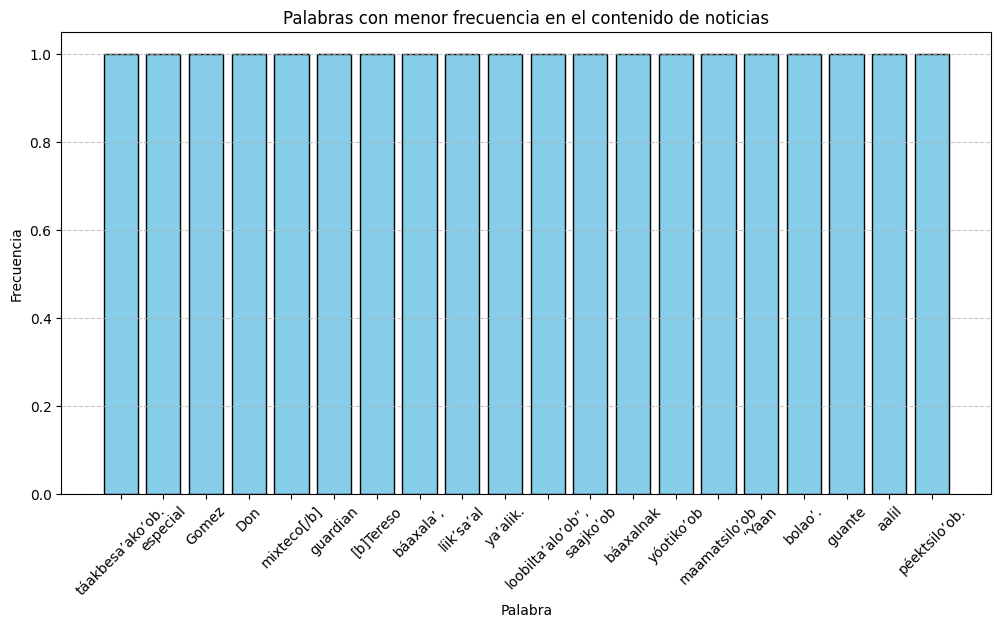

In [2]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
noticias = pd.read_csv('noticias_2016_2.csv')

# Concatenar todo el contenido en una sola cadena de texto
all_content = ' '.join(noticias['Contenido'].dropna().tolist())

# Dividir el contenido en palabras
words = all_content.split()

# Contar la frecuencia de cada palabra
word_freq = Counter(words)

# Convertir el contador a un DataFrame para facilitar la visualización
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia en orden ascendente
word_freq_df = word_freq_df.sort_values(by='Frecuencia', ascending=True)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
plt.bar(word_freq_df['Palabra'][:20], word_freq_df['Frecuencia'][:20], color='skyblue', edgecolor='black')

# Personalizar la gráfica
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras con menor frecuencia en el contenido de noticias')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de rejilla

# Mostrar la gráfica
plt.show()
